In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from excel_manager import ExcelManager

In [2]:
path_input_excel = r"C:\Users\robbe\Downloads\Gas_production_KRA_BEP_R.Grobben_final_RESULTS.xlsx"

#make instance of excel manger
manager = ExcelManager(path_input_excel)

# load the workbook in
manager.load_workbook()

In [3]:
# check the sheet names
sheet_names = manager.get_sheet_names()
print(sheet_names)

['Notes', 'GT1.1', 'GT1.2', 'GT2.1', 'GT2.2', 'GT3.1', 'GT3.2', 'GT4.1', 'GT4.2', 'GT5.1', 'GT5.2', 'GT6.1', 'GT6.2', 'GT7.1', 'GT7.2', 'GT8.1', 'GT8.2', 'Blad1']


In [4]:
column_names = ['Sample ID', 'Parallel', 'Date', 'Time', 'P atm', 'P sample before gc', 'P sample after gc', 'CH4', 'CO2', 'O2', 'N2', 'Flush (1=yes; 0=no)', 'Comments', 'GC method', 'Weight', 'Date + Time', 'Day', 'Sum', 'CH4-corr', 'CO2-corr', 'O2-corr', 'N2-corr', 'Sum-corr', 'mg_bs', 'mCO2_b', 'mCH4_b', 'mO2_b', 'mN2_b', 'mCTot_b', 'mg_as', 'mCO2_a', 'mCH4_a', 'mO2_a', 'mN2_a', 'mCTot_a', 'mCTot_produced', 'O2 consumed', 'CO2 produced', 'O2 consumed_cum', 'CO2 produced_cum', 'mCTot_produced_cum', 'Cgas_DM_cum', 'PP CO2_b', 'CO2_b_aq [mol/m3]', 'CO2_b_aq [mol]', 'PP CO2_a', 'CO2_a_aq [mol/m3]', 'CO2_a_aq [mol]', "CO2_dissolved_between_time_steps_aq", 'CO2_produced_aq', 'DIC_cum', 'Ctot_DM', 'Ratio O2/CO2']
column_units = ['', '', '', '', 'hPa', 'hPa', 'hPa', '%', '%', '%', '%', '', '', '', 'g', '', '', '%', '%', '%', '%', '%', 'mol', 'mol', 'mol', 'mol', 'mol', 'mol', 'mol', 'mol', 'mol', 'mol', 'mol', 'mol', 'mol', 'mol', 'mol', 'mol', 'mol', 'mol', 'mg C/gDW', 'Pa', 'mol/m3', 'mol', 'mol', 'mg C/gDW', 'mg C/gDW', '-']

column_units_dict = dict(zip(column_names, column_units))
print(len(column_names))

49


In [5]:
sample_sheet_names = sheet_names[1:-1]
dict_data_frames = {}

for sheet_name in sample_sheet_names:
    dict_data_frames[sheet_name] = manager.load_sheet_table_with_input_header(sheet_name=sheet_name, start_row=12, end_column=49, column_names=column_names)
    print(f"{sheet_name} is done")

GT1.1 is done
GT1.2 is done
GT2.1 is done
GT2.2 is done
GT3.1 is done
GT3.2 is done
GT4.1 is done
GT4.2 is done
GT5.1 is done
GT5.2 is done
GT6.1 is done
GT6.2 is done
GT7.1 is done
GT7.2 is done
GT8.1 is done
GT8.2 is done


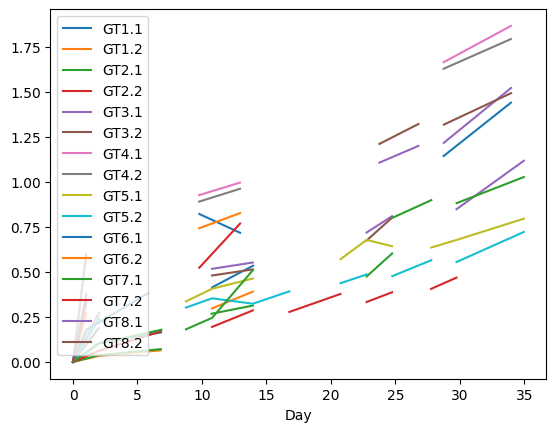

In [6]:
fig, ax = plt.subplots()

for sheet_name in sample_sheet_names:
    data_frame = dict_data_frames[sheet_name]
    data_frame.plot(x="Day", y="Ctot_DM", ax=ax, label=sheet_name )

<Axes: xlabel='Day'>

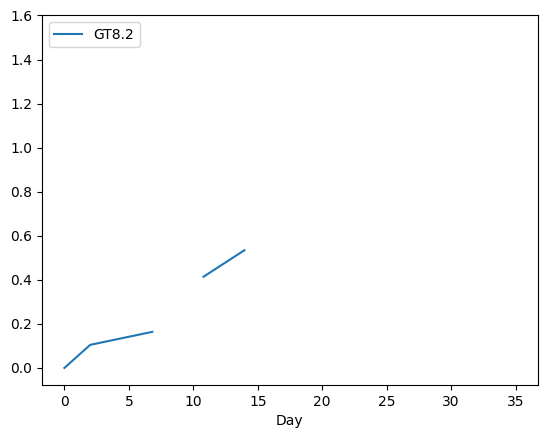

In [7]:
data_frame = dict_data_frames["GT1.1"]
data_frame.plot(x="Day", y="Ctot_DM", label=sheet_name )


In [8]:
display(data_frame["Ctot_DM"])


0     0.000000
1     0.104690
2     0.163775
3          NaN
4     0.226886
5          NaN
6     0.414075
7     0.534193
8          NaN
9     0.643041
10         NaN
11    0.922152
12         NaN
13    0.938600
14         NaN
15    1.011999
16         NaN
17    1.148188
18         NaN
19    1.174263
20         NaN
21    1.525201
22         NaN
Name: Ctot_DM, dtype: float64

0     0.000000
1     0.104690
2     0.163775
3     0.163775
4     0.226886
5     0.226886
6     0.414075
7     0.534193
8     0.534193
9     0.643041
10    0.643041
11    0.922152
12    0.922152
13    0.938600
14    0.938600
15    1.011999
16    1.011999
17    1.148188
18    1.148188
19    1.174263
20    1.174263
21    1.525201
22    1.525201
Name: Ctot_DM, dtype: float64

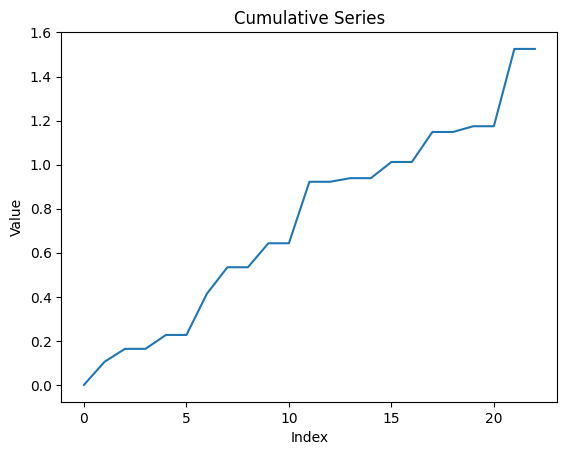

In [9]:
data_frame_2 = data_frame
data_frame_2["Ctot_DM"] = data_frame_2["Ctot_DM"].ffill()
display(data_frame_2["Ctot_DM"])

plt.plot(data_frame_2['Ctot_DM'])
plt.title('Cumulative Series')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()


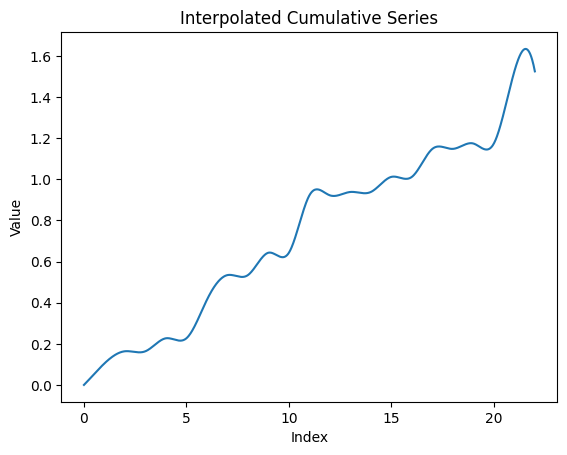

In [10]:
import numpy as np
from scipy.interpolate import interp1d

df = data_frame

# Drop the rows where 'CumulativeColumn' is NaN
df_dropped = df.dropna(subset=['Ctot_DM'])

# Generate interpolation function
f = interp1d(df_dropped.index, df_dropped['Ctot_DM'], kind='cubic')

# Generate new index values
xnew = np.linspace(df_dropped.index.min(), df_dropped.index.max(), num=1000, endpoint=True)

# Plot the interpolated values
plt.plot(xnew, f(xnew))
plt.title('Interpolated Cumulative Series')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

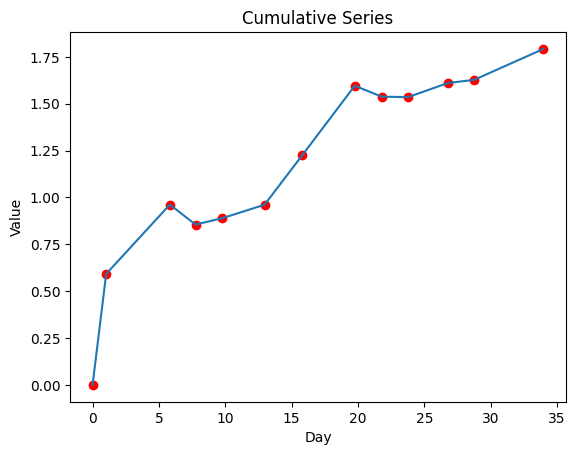

In [11]:
import numpy as np
from scipy.interpolate import interp1d
df = dict_data_frames["GT4.2"]

# Drop the rows where 'CumulativeColumn' is NaN
df_dropped = df.dropna(subset=['Ctot_DM'])

##Plot the line
plt.plot(df_dropped['Day'], df_dropped['Ctot_DM'], label='Cumulative Series')

# Plot the data points
plt.scatter(df_dropped['Day'], df_dropped['Ctot_DM'], color='red', label='Data Points')


plt.title('Cumulative Series')
plt.xlabel('Day')
plt.ylabel('Value')
plt.show()

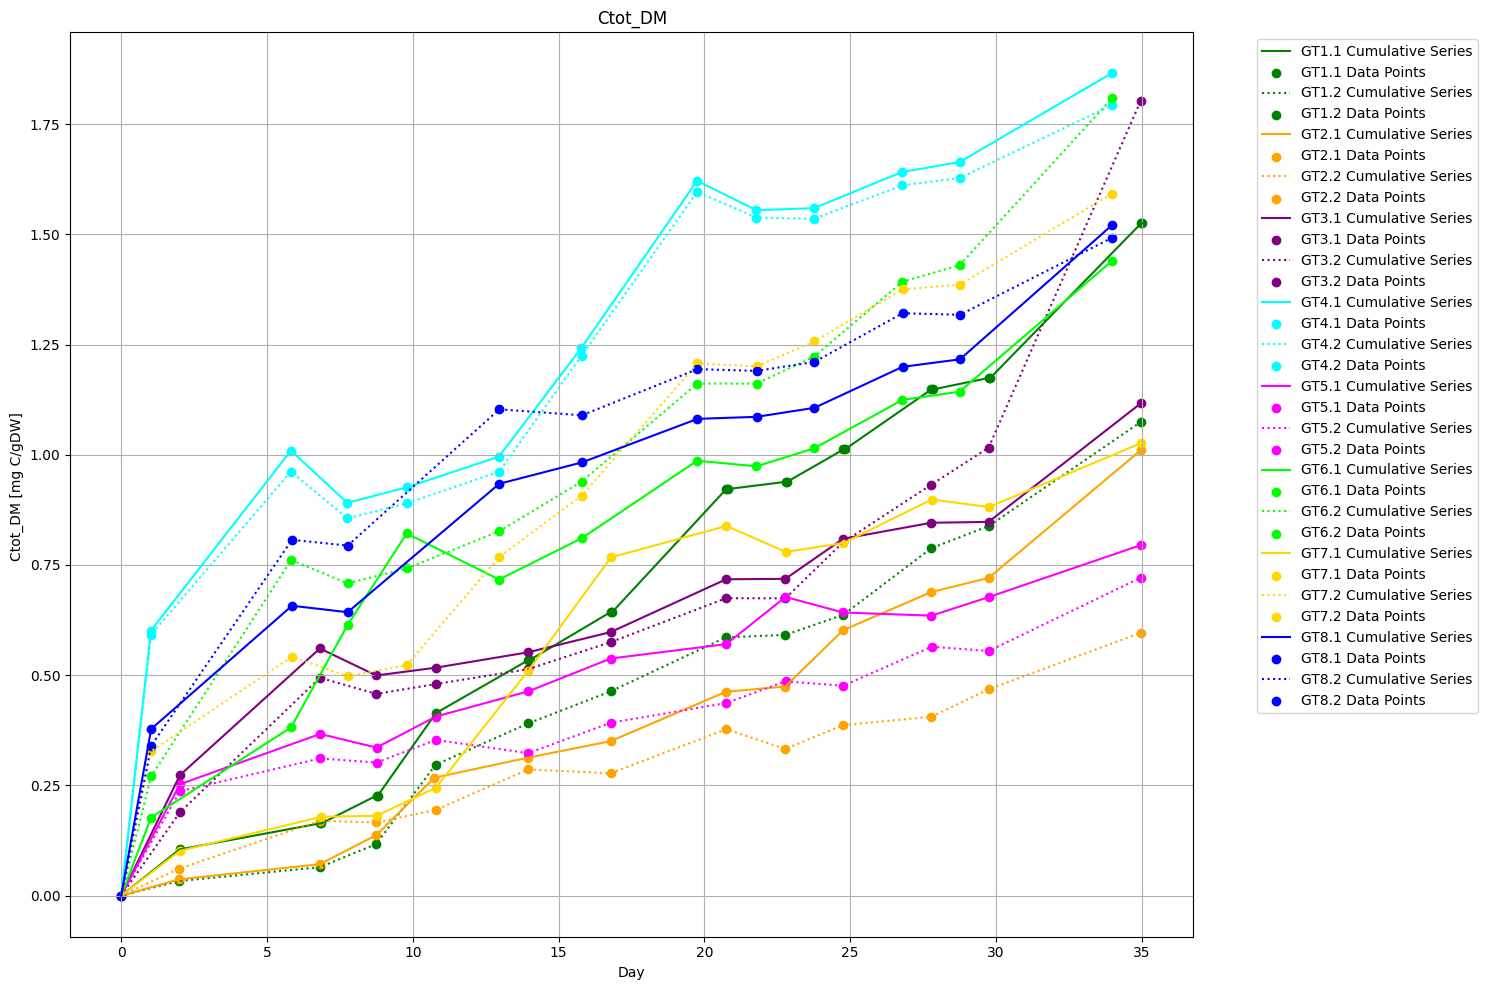

In [22]:
colors = ['green', "green", 'orange', 'orange', 'purple', 'purple', 'cyan', 'cyan',
          'magenta', 'magenta', 'lime', 'lime', 'gold', 'gold', 'blue', 'blue']
line_styles = ["solid", "dotted", "solid", "dotted", "solid", "dotted", "solid", "dotted", "solid", "dotted", "solid", "dotted", "solid", "dotted", "solid", "dotted"]

plt.figure(figsize=(15, 10))
for color, sheet_name, line_style in zip(colors, sample_sheet_names, line_styles):
    df = dict_data_frames[sheet_name]

    # Drop the rows where 'CumulativeColumn' is NaN
    df_dropped = df.dropna(subset=['Ctot_DM'])

    # Plot the line
    plt.plot(df_dropped['Day'], df_dropped['Ctot_DM'], linestyle=line_style, color=color, label=f'{sheet_name} Cumulative Series')

    # Plot the data points
    plt.scatter(df_dropped['Day'], df_dropped['Ctot_DM'], color=color, label=f'{sheet_name} Data Points')

plt.title('Ctot_DM')
plt.xlabel('Day')
plt.ylabel('Ctot_DM [mg C/gDW] ')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Position the legend to the right of the plot
plt.tight_layout()
plt.grid()# Show the legend
plt.show()


In [23]:
def check_cumulative_2(df, column_name):
    if column_name not in df.columns:
        raise ValueError("The dataframe does not contain the specified column.")

    false_rows = []
    for i in range(1, len(df)):
        if df[column_name].iloc[i] < df[column_name].iloc[i-1]:
            false_rows.append(i)

    return false_rows

In [24]:
# import unittest
# import pandas as pd
# # from your_script import check_cumulative  # Assuming the function is in your_script.py
#
# class TestCheckCumulative(unittest.TestCase):
#     def setUp(self):
#         self.df = pd.DataFrame({
#             'A': [1, 2, 3, 4, 5],
#             'B': [1, 2, 1, 4, 5],
#             'C': [1, 2, 2, 4, 5]
#         })
#
#     def test_cumulative(self):
#         self.assertEqual(check_cumulative(self.df, 'A'), [])
#         self.assertEqual(check_cumulative(self.df, 'B'), [2])
#         self.assertEqual(check_cumulative(self.df, 'C'), [2])
#
#     def test_nonexistent_column(self):
#         with self.assertRaises(ValueError):
#             check_cumulative(self.df, 'D')
#
# if __name__ == '__main__':
#     unittest.main()

In [25]:
dict_incorrect_cum = {}

for sheet_name in sample_sheet_names:
    incorrect_index_list_Ctot_DM =  check_cumulative_2(df=dict_data_frames[sheet_name], column_name="Ctot_DM")
    dict_incorrect_cum[sheet_name] = incorrect_index_list_Ctot_DM
    incorrect_index_list_Cgas_DM_cum  =  check_cumulative_2(df=dict_data_frames[sheet_name], column_name="Cgas_DM_cum")
    dict_incorrect_cum[sheet_name].extend(incorrect_index_list_Cgas_DM_cum)
    incorrect_index_list_DIC_cum  =  check_cumulative_2(df=dict_data_frames[sheet_name], column_name="DIC_cum")
    dict_incorrect_cum[sheet_name].extend(incorrect_index_list_DIC_cum)

print(dict_incorrect_cum["GT1.1"])


[3, 5, 8, 10, 12, 14, 16, 18, 20, 22]


In [26]:
dict_incorrect_cum = {}

for sheet_name in sample_sheet_names:
    dict_incorrect_cum[sheet_name] = {}

    dict_incorrect_cum[sheet_name]['incorrect_index_list_Ctot_DM'] = check_cumulative_2(df=dict_data_frames[sheet_name], column_name="Ctot_DM")
    dict_incorrect_cum[sheet_name]['incorrect_index_list_Cgas_DM_cum'] = check_cumulative_2(df=dict_data_frames[sheet_name], column_name="Cgas_DM_cum")
    dict_incorrect_cum[sheet_name]['incorrect_index_list_DIC_cum'] = check_cumulative_2(df=dict_data_frames[sheet_name], column_name="DIC_cum")
    print(f"{sheet_name} is done")





GT1.1 is done
GT1.2 is done
GT2.1 is done
GT2.2 is done
GT3.1 is done
GT3.2 is done
GT4.1 is done
GT4.2 is done
GT5.1 is done
GT5.2 is done
GT6.1 is done
GT6.2 is done
GT7.1 is done
GT7.2 is done
GT8.1 is done
GT8.2 is done


In [27]:
print(dict_incorrect_cum["GT1.1"])

{'incorrect_index_list_Ctot_DM': [], 'incorrect_index_list_Cgas_DM_cum': [], 'incorrect_index_list_DIC_cum': [3, 5, 8, 10, 12, 14, 16, 18, 20, 22]}


In [28]:
print(dict_incorrect_cum)

{'GT1.1': {'incorrect_index_list_Ctot_DM': [], 'incorrect_index_list_Cgas_DM_cum': [], 'incorrect_index_list_DIC_cum': [3, 5, 8, 10, 12, 14, 16, 18, 20, 22]}, 'GT1.2': {'incorrect_index_list_Ctot_DM': [], 'incorrect_index_list_Cgas_DM_cum': [], 'incorrect_index_list_DIC_cum': [3, 5, 8, 10, 12, 14, 16, 18, 20, 22]}, 'GT2.1': {'incorrect_index_list_Ctot_DM': [], 'incorrect_index_list_Cgas_DM_cum': [], 'incorrect_index_list_DIC_cum': [3, 5, 8, 10, 12, 15, 17, 19, 21]}, 'GT2.2': {'incorrect_index_list_Ctot_DM': [], 'incorrect_index_list_Cgas_DM_cum': [], 'incorrect_index_list_DIC_cum': [3, 5, 8, 11, 14, 17, 19]}, 'GT3.1': {'incorrect_index_list_Ctot_DM': [], 'incorrect_index_list_Cgas_DM_cum': [], 'incorrect_index_list_DIC_cum': [2, 4, 6, 9, 11, 13, 16, 18, 21]}, 'GT3.2': {'incorrect_index_list_Ctot_DM': [], 'incorrect_index_list_Cgas_DM_cum': [], 'incorrect_index_list_DIC_cum': [2, 4, 6, 9, 11, 13, 16, 18, 20, 22]}, 'GT4.1': {'incorrect_index_list_Ctot_DM': [], 'incorrect_index_list_Cgas_

In [29]:
df_incorrect_sum = pd.DataFrame(dict_incorrect_cum).T

In [30]:
display(df_incorrect_sum)

,incorrect_index_list_Ctot_DM,incorrect_index_list_Cgas_DM_cum,incorrect_index_list_DIC_cum
GT1.1,[],[],"[3, 5, 8, 10, 12, 14, 16, 18, 20, 22]"
GT1.2,[],[],"[3, 5, 8, 10, 12, 14, 16, 18, 20, 22]"
GT2.1,[],[],"[3, 5, 8, 10, 12, 15, 17, 19, 21]"
GT2.2,[],[],"[3, 5, 8, 11, 14, 17, 19]"
GT3.1,[],[],"[2, 4, 6, 9, 11, 13, 16, 18, 21]"
GT3.2,[],[],"[2, 4, 6, 9, 11, 13, 16, 18, 20, 22]"
GT4.1,[],[],"[2, 4, 6, 9, 11, 13, 15, 17, 19, 22]"
GT4.2,[],[],"[2, 4, 6, 9, 11, 13, 15, 17, 19, 22]"
GT5.1,[13],[13],"[2, 4, 8, 10, 14, 18]"
GT5.2,[7],[7],"[2, 4, 7, 9, 12, 15, 18]"


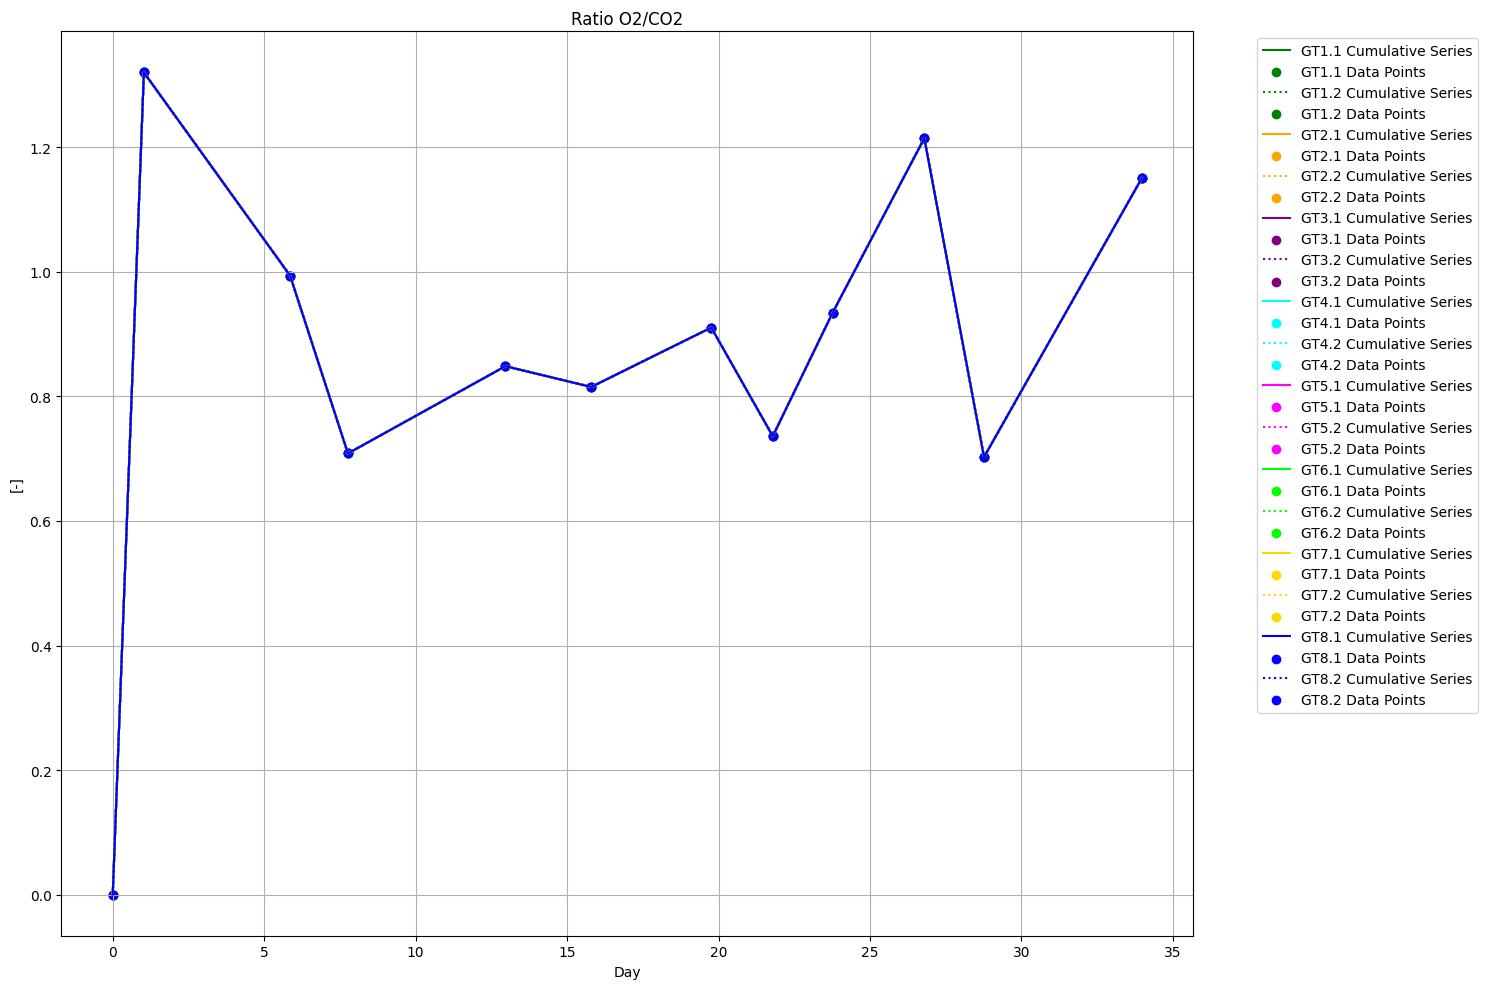

In [31]:
colors = ['green', "green", 'orange', 'orange', 'purple', 'purple', 'cyan', 'cyan',
          'magenta', 'magenta', 'lime', 'lime', 'gold', 'gold', 'blue', 'blue']
line_styles = ["solid", "dotted", "solid", "dotted", "solid", "dotted", "solid", "dotted", "solid", "dotted", "solid", "dotted", "solid", "dotted", "solid", "dotted"]

plt.figure(figsize=(15, 10))
for color, sheet_name, line_style in zip(colors, sample_sheet_names, line_styles):
    df = dict_data_frames[sheet_name]

    # Plot the line
    plt.plot(df_dropped['Day'], df_dropped['Ratio O2/CO2'], linestyle=line_style, color=color, label=f'{sheet_name} Cumulative Series')

    # Plot the data points
    plt.scatter(df_dropped['Day'], df_dropped['Ratio O2/CO2'], color=color, label=f'{sheet_name} Data Points')

plt.title('Ratio O2/CO2')
plt.xlabel('Day')
plt.ylabel('[-]')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Position the legend to the right of the plot
plt.tight_layout()
plt.grid()# Show the legend
plt.show()
